# **Importing libraries**

**imblearn.under_sampling.CondensedNearestNeighbour**: Implements the Condensed Nearest Neighbors algorithm for under-sampling.

**sklearn.decomposition.PCA**: Implements Principal Component Analysis for dimensionality reduction.

**sklearn.preprocessing.StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.

**imblearn.over_sampling.SMOTE**: Implements Synthetic Minority Over-sampling Technique for over-sampling.

**sklearn.neighbors.KDTree and sklearn.neighbors.BallTree**: Implement KD-tree and Ball-tree data structures, respectively, for efficient nearest neighbors search.

In [120]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from imblearn.datasets import make_imbalance
from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree
import time


time: 1.74 ms (started: 2024-01-07 15:44:09 +00:00)


In [121]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 13.5 s (started: 2024-01-07 15:44:09 +00:00)


In [122]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/waveform_data.csv")

time: 160 ms (started: 2024-01-07 15:44:23 +00:00)


# **Importing the dataset**

Since we use google, we have uploaded the dataset to google drive and set the location for easier access. Location can be modified as per user's dataset location.

In [123]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


time: 96.9 ms (started: 2024-01-07 15:44:23 +00:00)


# **Reading and describing the dataset**

The shape for the dataset is 5000 x 21. There are three different classifications of the waveform as 0,1 and 2.

In [124]:
df.shape

(5000, 22)

time: 2.84 ms (started: 2024-01-07 15:44:23 +00:00)


In [125]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378,1.007800
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064,0.818946
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000,0.000000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000,0.000000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000,1.000000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000,2.000000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000,2.000000


time: 337 ms (started: 2024-01-07 15:44:23 +00:00)


# **Correlation matrix of the dataset is given below**

In [126]:
correlation_matrix = df.corr()
print(correlation_matrix)

           0         1         2         3         4         5         6  \
0   1.000000  0.003445 -0.012182 -0.008974 -0.010520  0.003936 -0.009380   
1   0.003445  1.000000  0.168465  0.213244  0.260190  0.271216  0.258219   
2  -0.012182  0.168465  1.000000  0.372892  0.430006  0.440335  0.440655   
3  -0.008974  0.213244  0.372892  1.000000  0.558078  0.570066  0.565426   
4  -0.010520  0.260190  0.430006  0.558078  1.000000  0.655717  0.655947   
5   0.003936  0.271216  0.440335  0.570066  0.655717  1.000000  0.715144   
6  -0.009380  0.258219  0.440655  0.565426  0.655947  0.715144  1.000000   
7  -0.003983  0.212376  0.355403  0.430403  0.529678  0.609012  0.681378   
8   0.014483  0.134737  0.209571  0.260621  0.300970  0.426313  0.520954   
9   0.025222 -0.004828 -0.003468 -0.004680  0.002807  0.134934  0.222589   
10  0.031390 -0.124312 -0.208134 -0.283565 -0.318316 -0.209955 -0.117340   
11  0.007920 -0.207686 -0.357164 -0.456966 -0.527066 -0.485205 -0.419717   
12  0.008378

# **Dataset split**

We use train_test_split() to split the dataset into training set and test set with the ratio of 80% and 20%.

In [127]:
y_column_name = df.columns[21]
y = df[y_column_name]
df.drop(columns=[y_column_name], inplace=True)
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

time: 11.9 ms (started: 2024-01-07 15:44:23 +00:00)


# **Implementation of KNeighborsClassifier**

Classifier implementing the k-nearest neighbors
\
\
Parameters used:\
n_neighbors int, default=5 \
Number of neighbors to use by default for kneighbors queries.



In [128]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

time: 12.9 ms (started: 2024-01-07 15:44:23 +00:00)


# **Calulating Accuracy**
We predict x_test and check the accuracy with the y_test \


accuracy_score() :- \

Accuracy classification score.This function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [129]:
accuracy_score(y_test,knn.predict(x_test))

0.832

time: 241 ms (started: 2024-01-07 15:44:23 +00:00)


# **Tuning of K**

Performing cross-validation with different values of k for the k-nearest neighbors classifier. This is a common approach to find the optimal value of k.

Here, we get the optimal value of k as 58 with the accuracy of 85%

In [130]:
k=list(range(1,100))
accuracies_knn=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=x_train,y=y_train,cv=5,scoring="accuracy")
    accuracies_knn.append(np.mean(c_v))

time: 1min 17s (started: 2024-01-07 15:44:24 +00:00)


In [131]:
print("Best k = ",np.argmax(accuracies_knn) + 1)
print(max(accuracies_knn))

Best k =  58
0.8560000000000001
time: 3.19 ms (started: 2024-01-07 15:45:41 +00:00)


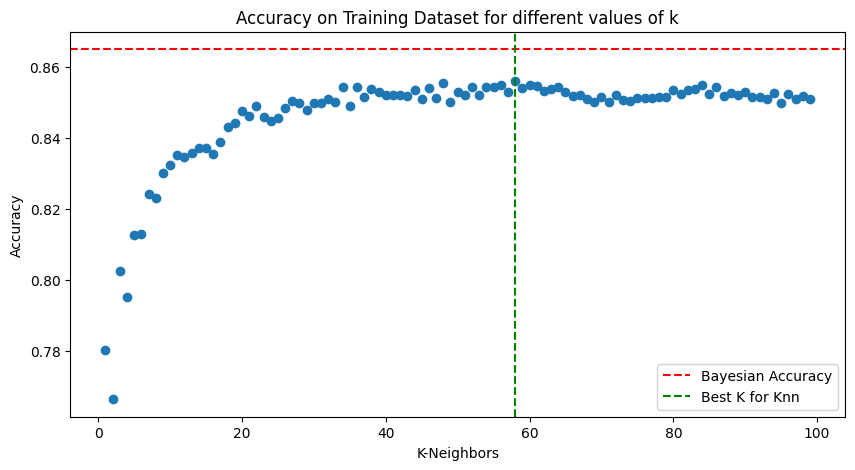

time: 557 ms (started: 2024-01-07 15:45:41 +00:00)


In [132]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=accuracies_knn)
plt.xlabel('K-Neighbors')
plt.ylabel("Accuracy")
plt.axhline(0.865,linestyle='--',color='r',label= 'Bayesian Accuracy')
plt.axvline(np.argmax(accuracies_knn) + 1,linestyle='--',color='g',label= 'Best K for Knn')
plt.legend()
plt.title("Accuracy on Training Dataset for different values of k")
plt.savefig('knn_accuracy.png')

In [133]:
y_train = np.array(y_train)
y_test = np.array(y_test)

time: 724 µs (started: 2024-01-07 15:45:42 +00:00)


# **Methods to speed up the calculations**



1.   KDTree
2.   BallTree

We get the accuracy of 79% in both the methods

In [134]:
tree = KDTree(x_train, leaf_size=2)
distances, indices = tree.query(x_test, k=1)
# Extract the distance to the second nearest neighbor
second_nearest_distances = distances
#print(indices)
predicted = [y_train[h] for h in indices]
print("Accuracy for KDTree : ",accuracy_score(y_test,predicted))

Accuracy for KDTree :  0.79
time: 909 ms (started: 2024-01-07 15:45:42 +00:00)


In [135]:
balltree = BallTree(x_train, leaf_size=2,metric='euclidean')
ball_distances, ball_indices = balltree.query(x_test, k=1)
ball_second_nearest_distances = ball_distances
ball_predicted = [y_train[h] for h in ball_indices]
print("Accuracy for BallTree : ",accuracy_score(y_test,ball_predicted))

Accuracy for BallTree :  0.79
time: 278 ms (started: 2024-01-07 15:45:42 +00:00)


# **Data reduction technique**

The aim of CNN is to produce a subset of dataset that can correctly classify all the data points in the original dataset.We also compare the accuracy of Knn and Cnn.

Best K for CNN : 20


In [136]:
cnn=CondensedNearestNeighbour(n_seeds_S=4,n_neighbors=1,random_state=42)
x_cnn,y_cnn=cnn.fit_resample(x_train,y_train)
x_cnn=pd.DataFrame(x_cnn)
y_cnn=pd.DataFrame(y_cnn)
knn_cnn=KNeighborsClassifier(n_neighbors=5)
knn_cnn.fit(x_cnn,y_cnn)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

time: 58 s (started: 2024-01-07 15:45:43 +00:00)


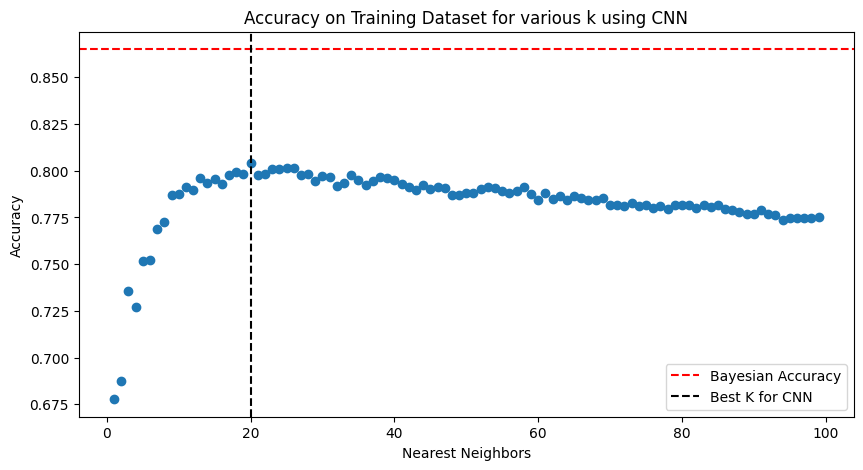

time: 24.7 s (started: 2024-01-07 15:46:41 +00:00)


In [137]:
k=list(range(1,100)) # List of all Neighbors
accuracies_cnn=[]
# We are checking for every k the cross-validation accuracy.
# Calculating Accuracy using Cross-Validation.
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=x_cnn.values,y=y_cnn.values.reshape(-1),cv=5,scoring="accuracy")
    accuracies_cnn.append(np.mean(c_v))


plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=accuracies_cnn)
plt.xlabel('Nearest Neighbors')
plt.ylabel("Accuracy")
plt.axhline(0.865,linestyle='--',color='r',label= 'Bayesian Accuracy')
plt.axvline((np.argmax(accuracies_cnn))+1,linestyle='--',color='k',label= 'Best K for CNN')

plt.legend()
plt.title("Accuracy on Training Dataset for various k using CNN")
plt.savefig('cnn_accuracy.png')

In [138]:
print(max(accuracies_cnn))

0.8040087074991116
time: 5.08 ms (started: 2024-01-07 15:47:06 +00:00)


In [139]:
print("Best K for CNN :", (np.argmax(accuracies_cnn))+1)

Best K for CNN : 20
time: 2.09 ms (started: 2024-01-07 15:47:06 +00:00)


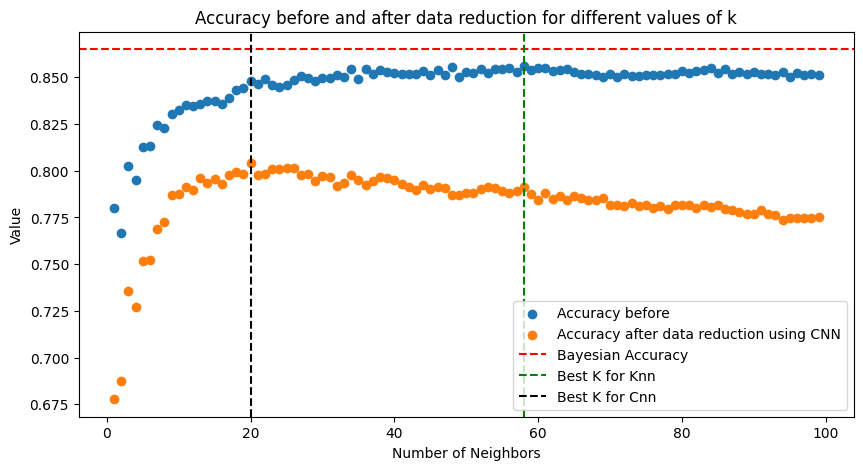

time: 571 ms (started: 2024-01-07 15:47:06 +00:00)


In [140]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=accuracies_knn,label='Accuracy before')
plt.scatter(x=list(range(1,100)),y=accuracies_cnn,label='Accuracy after data reduction using CNN')
plt.axhline(0.865,linestyle='--',color='r',label= 'Bayesian Accuracy')
plt.axvline((np.argmax(accuracies_knn))+1,linestyle='--',color='g',label= 'Best K for Knn')
plt.axvline((np.argmax(accuracies_cnn))+1,linestyle='--',color='k',label= 'Best K for Cnn')
plt.xlabel('Number of Neighbors')
plt.ylabel("Value")
plt.title("Accuracy before and after data reduction for different values of k")
plt.legend()
plt.savefig('knn_vs_cnn_accuracy.png')

# **Dimentionality reduction**

We performing feature scaling using StandardScaler and dimensionality reduction using Principal Component Analysis (PCA) on a DataFrame. We initialize a PCA object with the desired number of components (in this case, 3). Now the shape of the dataset is 5000 x 3.

The Preferred K value after dimentionality reduction is 82.

In [141]:
df1=pd.DataFrame(df)
scaling=StandardScaler()
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
print(x.shape)

(5000, 3)
time: 41.6 ms (started: 2024-01-07 15:47:06 +00:00)


In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

time: 2.86 ms (started: 2024-01-07 15:47:06 +00:00)


In [143]:
knn=KNeighborsClassifier(n_neighbors=70)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=70)

time: 20.1 ms (started: 2024-01-07 15:47:06 +00:00)


In [144]:
k=list(range(1,100))
accuracies_pca=[]
variances=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=x_train,y=y_train,cv=5,scoring="accuracy")
    accuracies_pca.append(np.mean(c_v))

time: 31.7 s (started: 2024-01-07 15:47:06 +00:00)


In [145]:
print(np.argmax(accuracies_pca)+1)

60
time: 2.19 ms (started: 2024-01-07 15:47:38 +00:00)


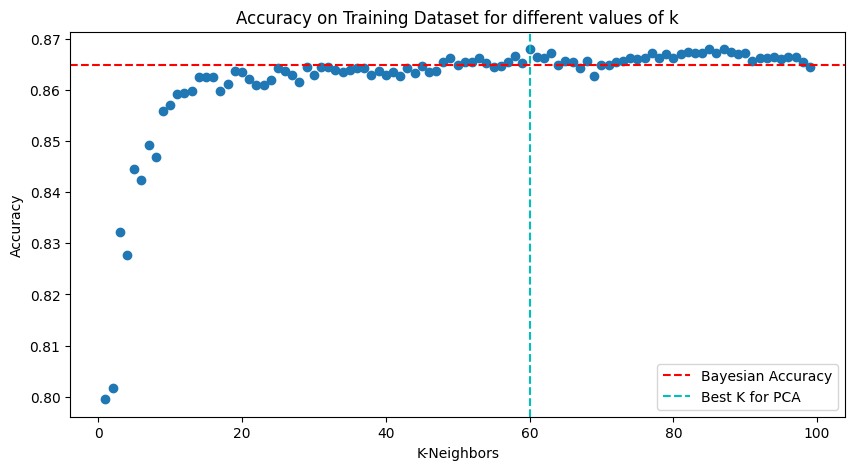

time: 440 ms (started: 2024-01-07 15:47:38 +00:00)


In [146]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=accuracies_pca)
plt.xlabel('K-Neighbors')
plt.ylabel("Accuracy")
plt.axhline(0.865,linestyle='--',color='r',label= 'Bayesian Accuracy')
plt.axvline((np.argmax(accuracies_pca))+1,linestyle='--',color='c',label= 'Best K for PCA')
plt.legend()
plt.title("Accuracy on Training Dataset for different values of k")
plt.savefig('PCA_accuracy.png')

# **Imbalanced Learning**

The algorithm selects a minority class instance, finds its k nearest neighbors, and then generates synthetic instances along the line segments connecting the chosen instance with its neighbors. This process helps in balancing the class distribution.

We can see the values of each class being the same here.

We also compare the accuracy and the F1-score for different values of K

In [147]:
X_res, y_res = make_imbalance(x_train, y_train,
                              sampling_strategy={0: 500, 1: 1000, 2: 1383},
                              random_state=42)
print(Counter(y_res))

Counter({2: 1383, 1: 1000, 0: 500})
time: 10.7 ms (started: 2024-01-07 15:47:38 +00:00)


In [148]:
knn_imbalance=KNeighborsClassifier(n_neighbors=20)
knn_imbalance.fit(X_res, y_res)

KNeighborsClassifier(n_neighbors=20)

time: 11.1 ms (started: 2024-01-07 15:47:38 +00:00)


In [149]:
y_pred_smote = knn_imbalance.predict(x_test)

time: 62 ms (started: 2024-01-07 15:47:38 +00:00)


In [150]:
print("F1 score ",f1_score(y_test,y_pred_smote,average='weighted'))
print("Accuracy score ",accuracy_score(y_test,y_pred_smote))


F1 score  0.8424103877849822
Accuracy score  0.846
time: 6.45 ms (started: 2024-01-07 15:47:38 +00:00)


In [154]:
k=list(range(1,100))
accuracies_imbalance=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_res,y=y_res,cv=5,scoring="accuracy")
    accuracies_imbalance.append(np.mean(c_v))

time: 23.4 s (started: 2024-01-07 15:47:39 +00:00)
time: 23.7 s (started: 2024-01-07 15:48:27 +00:00)


In [152]:
f_score=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_res,y=y_res,cv=5,scoring="f1_weighted")
    f_score.append(np.mean(c_v))

time: 24.3 s (started: 2024-01-07 15:48:02 +00:00)


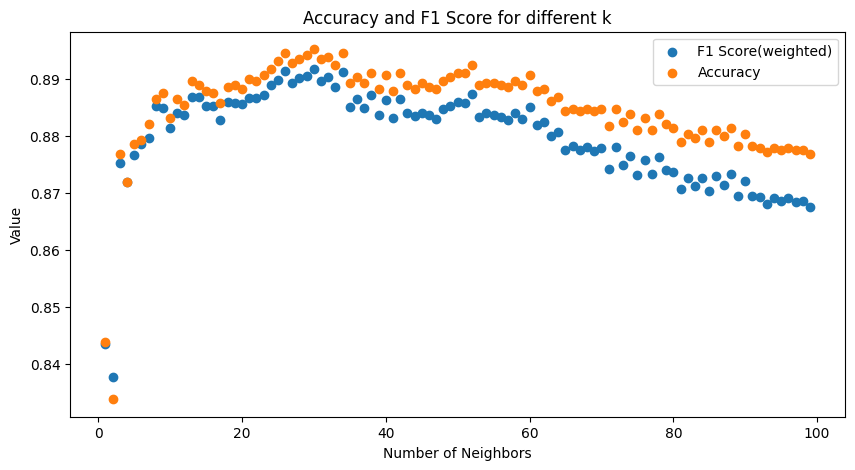

time: 460 ms (started: 2024-01-07 15:48:26 +00:00)


In [153]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=f_score,label='F1 Score(weighted)')
plt.scatter(x=list(range(1,100)),y=accuracies_imbalance,label='Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel("Value")
plt.title("Accuracy and F1 Score for different k")
plt.legend()
plt.savefig('smote_f1_accuracy.png')